# PLOT Madrid Subway Map

Use the file attached "shapes.txt" to plot a visualization of the Subway. That file contains the coordinates of the trayectories of metro lines in Madrid. This file contains the follwing columns:

* shape_id.  Id of the route
* shape_pt_lat. Latitud
* shape_pt_lon. Longitud
* shape_pt_sequence. Sequence number that allows to order all coordinates for the same route id
* shape_dist_traveled. Distance traveled from the departure station until the arrival station

Read the file and create a X coordinate vector with the latitudes and Y coordinate vector for the longitudes so that we can plot the lines. You can use whatever data structure that you consider. We propose you building a dictionary like this:


    routes={"4__R____1__IT_1": {"lat":[40.4178246350574, 40.4178289192889,....],
                                 "lon":[-3.70957559133661, -3.70965889246896,...]},
            ...............
            "4__9_B___2__IT_1": {"lat":[40.3044505907855,40.3046820792918,...],
                                 "lon":[-3.44775952445361,-3.44781016240426....]},
                                 }


In [71]:
routes={}
rows=[]
with open("shapes.txt","r") as file:
    header=file.readline().split(',')
    file=file.read()
    file=file.splitlines()
    for row in file:
        row=row.split(',')
        rows.append(row)
        if routes.get(row[0])==None:
            routes[row[0]]={'lat':[float(row[1])],'long':[float(row[2])]}
        else:
            routes[row[0]]['lat'].append(float(row[1]))
            routes[row[0]]['long'].append(float(row[2]))

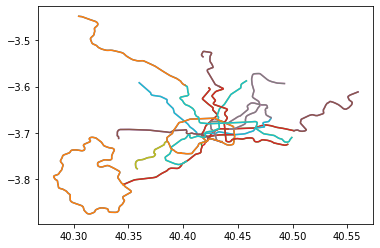

In [61]:
import matplotlib.pyplot as plt
for keys, values in routes.items():
    plt.plot(values['lat'],values['long'])
plt.show()

In [85]:
# Método por Pandas

import pandas as pd

pf= pd.DataFrame(rows,columns=header)

#### SOLUCION 1. Ignoring shape_pt_sequence, not needed because the shape points are ordered

In [2]:
with open("shapes.txt","r") as file:
    file.readline()
    lines=file.read().split("\n")
    rutas={}
    for line in lines:
        elements=line.split(",")
        clave=elements[0]
        lat=float(elements[1])
        long=float(elements[2])
        if clave not in rutas:
            rutas[clave]={"lat":[lat],"long":[long]}
        else:
            rutas[clave]["lat"].append(lat)
            rutas[clave]["long"].append(long)

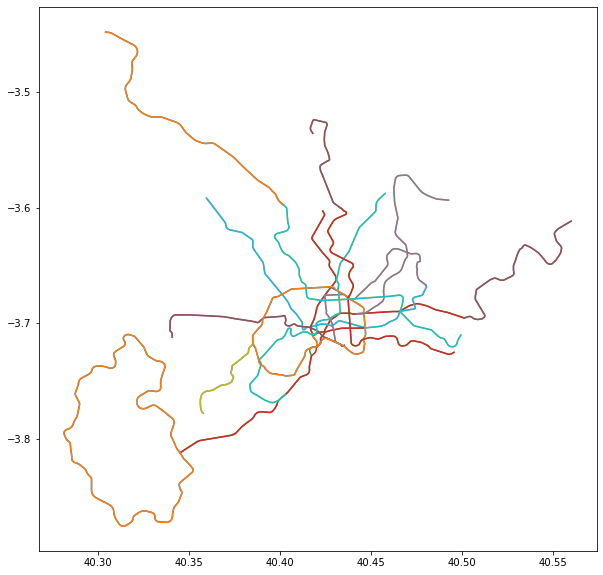

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for ruta,value in rutas.items():
    plt.plot(value["lat"],value["long"])

#### SOLUCION 2. Considering that the points might be shuffled and we need to order them before ploting

In [4]:
with open("shapes.txt","r") as file:
    file.readline()
    lines=file.read().split("\n")
    rutas={}
    for line in lines:
        elements=line.split(",")
        clave=elements[0]
        lat=float(elements[1])
        long=float(elements[2])
        orden=float(elements[3])
        if clave not in rutas:
            rutas[clave]={"lat":[lat],"long":[long],"order":[orden]}
        else:
            rutas[clave]["lat"].append(lat)
            rutas[clave]["long"].append(long)
            rutas[clave]["order"].append(orden)

In [5]:
def order_axis(diccionary):
    list_lat=diccionary["lat"]
    list_lon=diccionary["long"]
    list_order=diccionary["order"]
    data=list(zip(list_order,list_lat,list_lon))
    data.sort(key=lambda tup: tup[0]) 
    data_lat=[i[1]  for i in data]
    data_lon=[i[2]  for i in data]
    return data_lat,data_lon

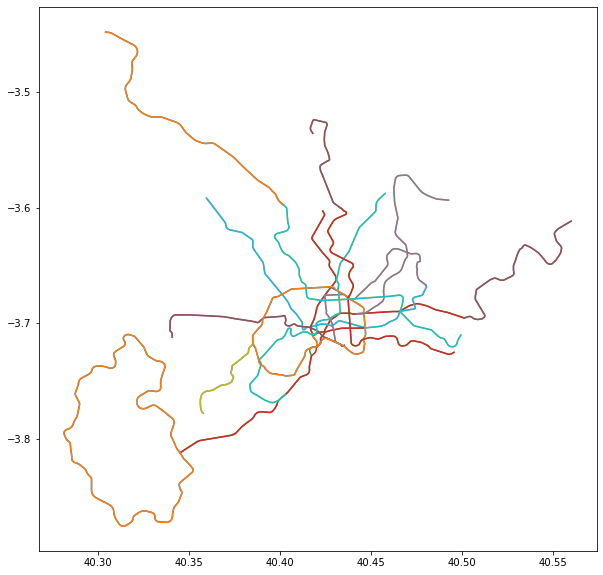

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for ruta,value in rutas.items():
    lat, lon=order_axis(value)
    plt.plot(lat,lon)